In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [9]:
from maxcut_solver import MaxCutSolver, ParametrizedGate
from strawberryfields.ops import *
from qmlt.numerical.helpers import make_param


def main(backend='fock_x'):

    c = 1
    A = np.array([[c, -2, -10, 1],
        [-2, c, 1, 5],
        [-10, 1, c, -2],
        [1, 5, -2, c]])

    graph_params = {}
    graph_params['c'] = 1
    graph_params['c_prim'] = 1
    graph_params['d'] = 0.05
    graph_params['A'] = A
    graph_params['coding'] = 'regular' #'half'

    learner_params = {
        'task': 'optimization',
        'regularization_strength': 0.5,
        'optimizer': 'SGD',
        'init_learning_rate': 5e-3,
        'log_every': 1,
        'plot': True
        }

    training_params = {
        'steps': 2,
        'trials': 1,
        'measure': True,
        'base': backend,
        'cutoff_dim': 5
        }

    # This is a failsafe - for some reasons if we do the measurements, 
    # we need much much smaller learning rate.
    # If you accidentally make it too big, it breaks your training and it may
    # take you some time to figure out what happened.
    if training_params['measure']:
        print("Warning! changed value of init_learning_rate ")
        learner_params['init_learning_rate'] = 1e-7



    gates_structure = []
    gates_structure.append(ParametrizedGate(Dgate, 0, [make_param(constant=np.random.random() - 0.5, name='displacement_0', regularize=True, monitor=True)]))
    gates_structure.append(ParametrizedGate(Dgate, 1, [make_param(constant=np.random.random() - 0.5, name='displacement_1', regularize=True, monitor=True)]))
    gates_structure.append(ParametrizedGate(Dgate, 2, [make_param(constant=np.random.random() - 0.5, name='displacement_2', regularize=True, monitor=True)]))
    gates_structure.append(ParametrizedGate(Dgate, 3, [make_param(constant=np.random.random() - 0.5, name='displacement_3', regularize=True, monitor=True)]))
    gates_structure.append(ParametrizedGate(Sgate, 0, [make_param(constant=np.random.random() - 0.5, name='squeeze_0', regularize=True, monitor=True)]))
    gates_structure.append(ParametrizedGate(Sgate, 1, [make_param(constant=np.random.random() - 0.5, name='squeeze_1', regularize=True, monitor=True)]))
    gates_structure.append(ParametrizedGate(Sgate, 2, [make_param(constant=np.random.random() - 0.5, name='squeeze_2', regularize=True, monitor=True)]))
    gates_structure.append(ParametrizedGate(Sgate, 3, [make_param(constant=np.random.random() - 0.5, name='squeeze_3', regularize=True, monitor=True)]))
    # gates_structure.append(ParametrizedGate(BSgate, (0, 1), [make_param(constant=0.1, name='bs_00', regularize=True, monitor=True),
    #               make_param(constant=0.1, name='bs_01', regularize=True, monitor=True)]))
    max_cut_solver = MaxCutSolver(learner_params, training_params, graph_params, gates_structure)
    max_cut_solver.train_and_evaluate_circuit()
    max_cut_solver.assess_all_solutions_clasically()

Warning! changed value of init_learning_rate 

----------------------------- 
 HYPERPARAMETERS: 

adaptive_learning_rate_threshold - 0.0 (default value)
circuit - User defined function.
decay - 0.0 (default value)
epsilon - 1e-06 (default value)
init_circuit_params - Values: [-0.43334809436721644, 0.09819103564962706, 0.4898941381255888, 0.3461287437820899, 0.3165707648246199, -0.03618458836169469, 0.285142775145825, 0.45694002994682037].
init_learning_rate - 1e-07
log_every - 1
loss - User defined function.
optimizer - SGD
plot - True
print_log - True (default value)
regularization_strength - 0.5
regularizer - User defined function.
task - optimization
warm_start - False (default value)

 -----------------------------
Initial loss = -4.318704824748655 | Initial regularizer = 0.23721509774445976 |  

Global step 1 | Loss = 5.236491588884414 | Regularizer = 0.8372687171346996 |  learning rate = 1e-07 |  
Global step 2 | Loss = -1.398212977066092 | Regularizer = 2.6329741083758615 |  lea

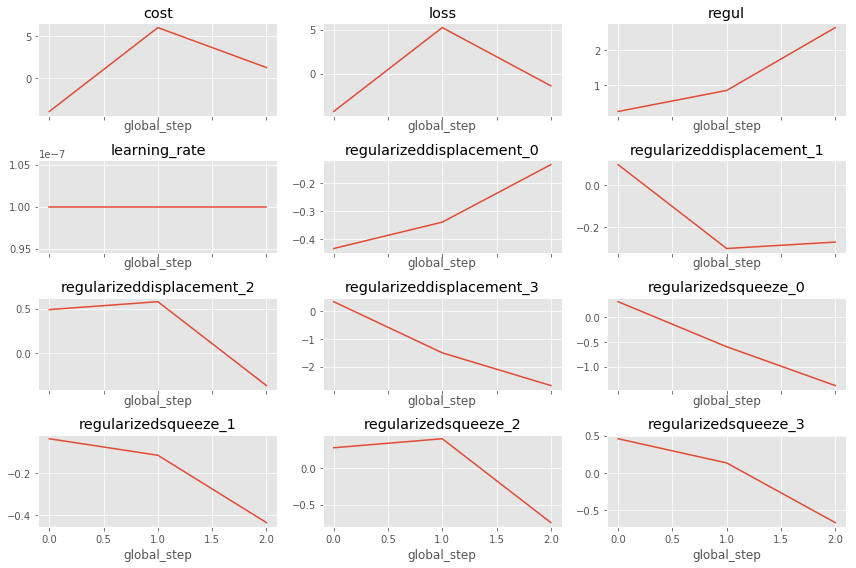

Parameter regularized/displacement_0 has the final value -0.13405328757823398.
Parameter regularized/displacement_1 has the final value -0.2727202777633849.
Parameter regularized/displacement_2 has the final value -0.3648270666875888.
Parameter regularized/displacement_3 has the final value -2.683149733364408.
Parameter regularized/squeeze_0 has the final value -1.3829663328102526.
Parameter regularized/squeeze_1 has the final value -0.4348893087803778.
Parameter regularized/squeeze_2 has the final value -0.7503129514360909.
Parameter regularized/squeeze_3 has the final value -0.665179979988394.


In [ ]:
if __name__ == '__main__':
    main(backend='tf')